In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_pickle('dataframes/df_input_to_classifier.pkl')

In [12]:
print('Dane wejściowe: \n', df.head())

X = df[['alg1', 'alg3', 'alg4']]
X = X.astype(int)
y = df['annotations']

unique_annotations = set(y)

y = y.replace(['N', 'A'], 'N+A')
y = y.replace(unique_annotations - {'N+A', 'V'}, 'Other')

print('\nZmienne objaśniające: \n', X)
print('\nZmienne zależne: \n', y)



Dane wejściowe: 
   alg1 alg3 alg4 alg5 annotations
0    2    3   30   41           N
1    2    3   13   40           N
2    2    4   31   42           N
3    2    4   14   41           N
4    3    4    1   41           N

Zmienne objaśniające: 
         alg1  alg3  alg4
0          2     3    30
1          2     3    13
2          2     4    31
3          2     4    14
4          3     4     1
...      ...   ...   ...
109960    12     5     1
109961    13     6    34
109962    12     5    34
109963    12     5     1
109964    12     5     1

[109965 rows x 3 columns]

Zmienne zależne: 
 0         N+A
1         N+A
2         N+A
3         N+A
4         N+A
         ... 
109960    N+A
109961    N+A
109962    N+A
109963    N+A
109964    N+A
Name: annotations, Length: 109965, dtype: object


In [13]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

knn = KNeighborsClassifier(n_neighbors=7)
dtree = tree.DecisionTreeClassifier()

classifiers = [knn, dtree]

classifier: KNeighborsClassifier(n_neighbors=7)
Accuracy (train): 0.8853913608314388
Accuracy (test): 0.8787208244922704


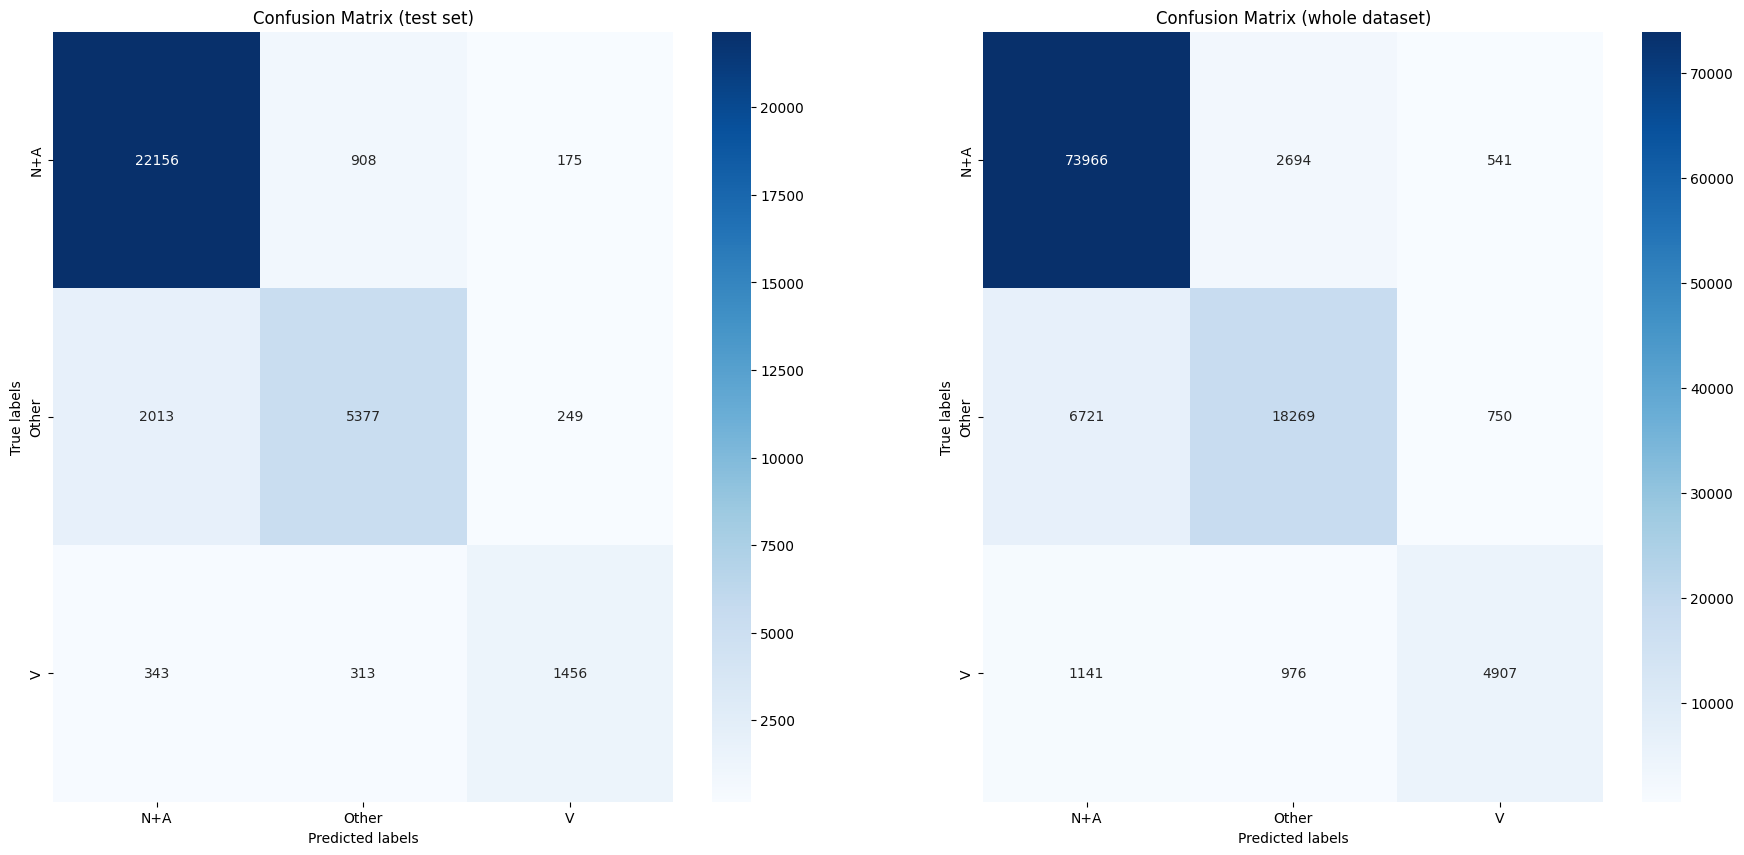

In [15]:
labels = np.unique(y)

clf = classifiers[0]

clf.fit(X_train, y_train) 

y_train_pred = clf.predict(X_train) # predykcja klas-zbiór terningowy
y_test_pred = clf.predict(X_test) # predykcja klas - zbiór testowy
y_all_pred = clf.predict(X)

print(f'classifier: {clf}')
print('Accuracy (train):', accuracy_score(y_train, y_train_pred))
print('Accuracy (test):', accuracy_score(y_test, y_test_pred))

cm_test = confusion_matrix(y_test, y_test_pred)
cm_train = confusion_matrix(y_train, y_train_pred)
cm_all = confusion_matrix(y, y_all_pred)

# Plot confusion matrix
fig = plt.figure(figsize=(22,10))
plt.subplot(1,2,1)

sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (test set)')
plt.savefig('Confusion Matrix (test set) with A')


plt.subplot(1,2,2)
sns.heatmap(cm_all, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (whole dataset)')

plt.show()

In [16]:
def plot_decision_boundries(clf, classifier_name):
        xx, yy, zz = np.meshgrid(np.linspace(-50, 50, 101),
                        np.linspace(-50, 50, 101),
                        np.linspace(-50, 50, 101))

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel()]).reshape(xx.shape)

        label_dict = {"N+A": 0, "V": 1, "Other": 2}

        data = np.where(Z == "N+A", label_dict["N+A"],
                                np.where(Z == "V", label_dict["V"],
                                        np.where(Z == "Other", label_dict["Other"], Z)))


        x, y, z = np.meshgrid(np.arange(101), np.arange(101), np.arange(101))

        # Define masks for each class
        mask_class0 = data == 0
        mask_class1 = data == 1
        mask_class2 = data == 2

        # Normalize coordinates to fit within 0-1 range
        x_norm = x / 100
        y_norm = y / 100
        z_norm = z / 100

        # Plot the 3D figure
        fig = plt.figure(figsize=(24,8))

        # Plot for class 0
        ax0 = fig.add_subplot(131, projection='3d')
        ax0.scatter(x[mask_class0], y[mask_class0], z[mask_class0], c=np.stack((x_norm[mask_class0], y_norm[mask_class0], z_norm[mask_class0]), axis=-1), marker='.')
        ax0.set_title('Class 0 - N+A')

        # Plot for class 1
        ax1 = fig.add_subplot(132, projection='3d')
        ax1.scatter(x[mask_class1], y[mask_class1], z[mask_class1], c=np.stack((x_norm[mask_class1], y_norm[mask_class1], z_norm[mask_class1]), axis=-1), marker='.')
        ax1.set_title('Class 1 - V')

        # Plot for class 2
        ax2 = fig.add_subplot(133, projection='3d')
        ax2.scatter(x[mask_class2], y[mask_class2], z[mask_class2], c=np.stack((x_norm[mask_class2], y_norm[mask_class2], z_norm[mask_class2]), axis=-1), marker='.')
        ax2.set_title('Class 2 - Other')

        for ax in [ax0, ax1, ax2]:
                ax.set_xlabel('Alg1')
                ax.set_ylabel('Alg3')
                ax.set_zlabel('Alg4')

        # plt.tight_layout()
        plt.show()

c:\Users\jerem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


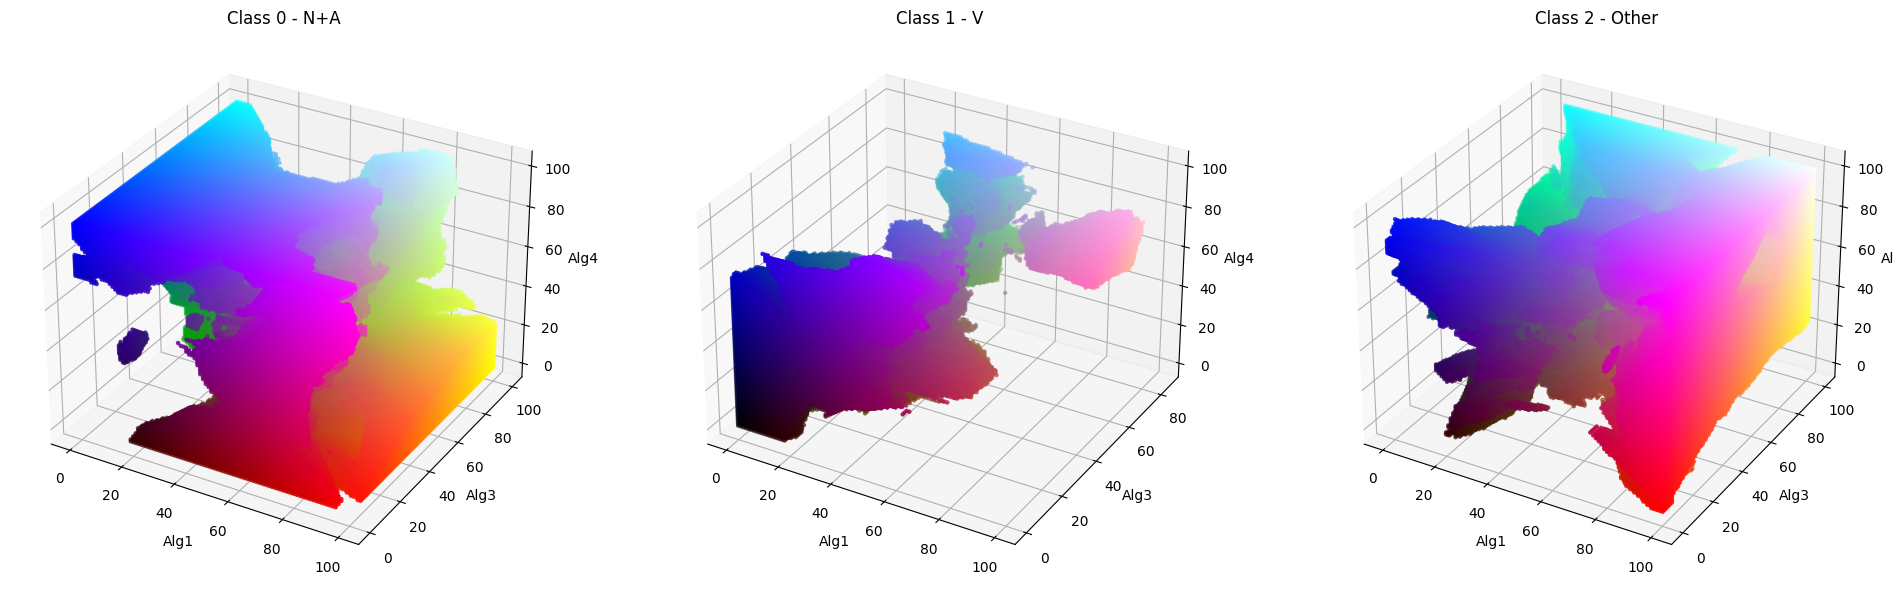

In [17]:
plot_decision_boundries(clf, "KNN")

classifier: DecisionTreeClassifier()
Accuracy (train): 0.9030984085742124
Accuracy (test): 0.881903607153683


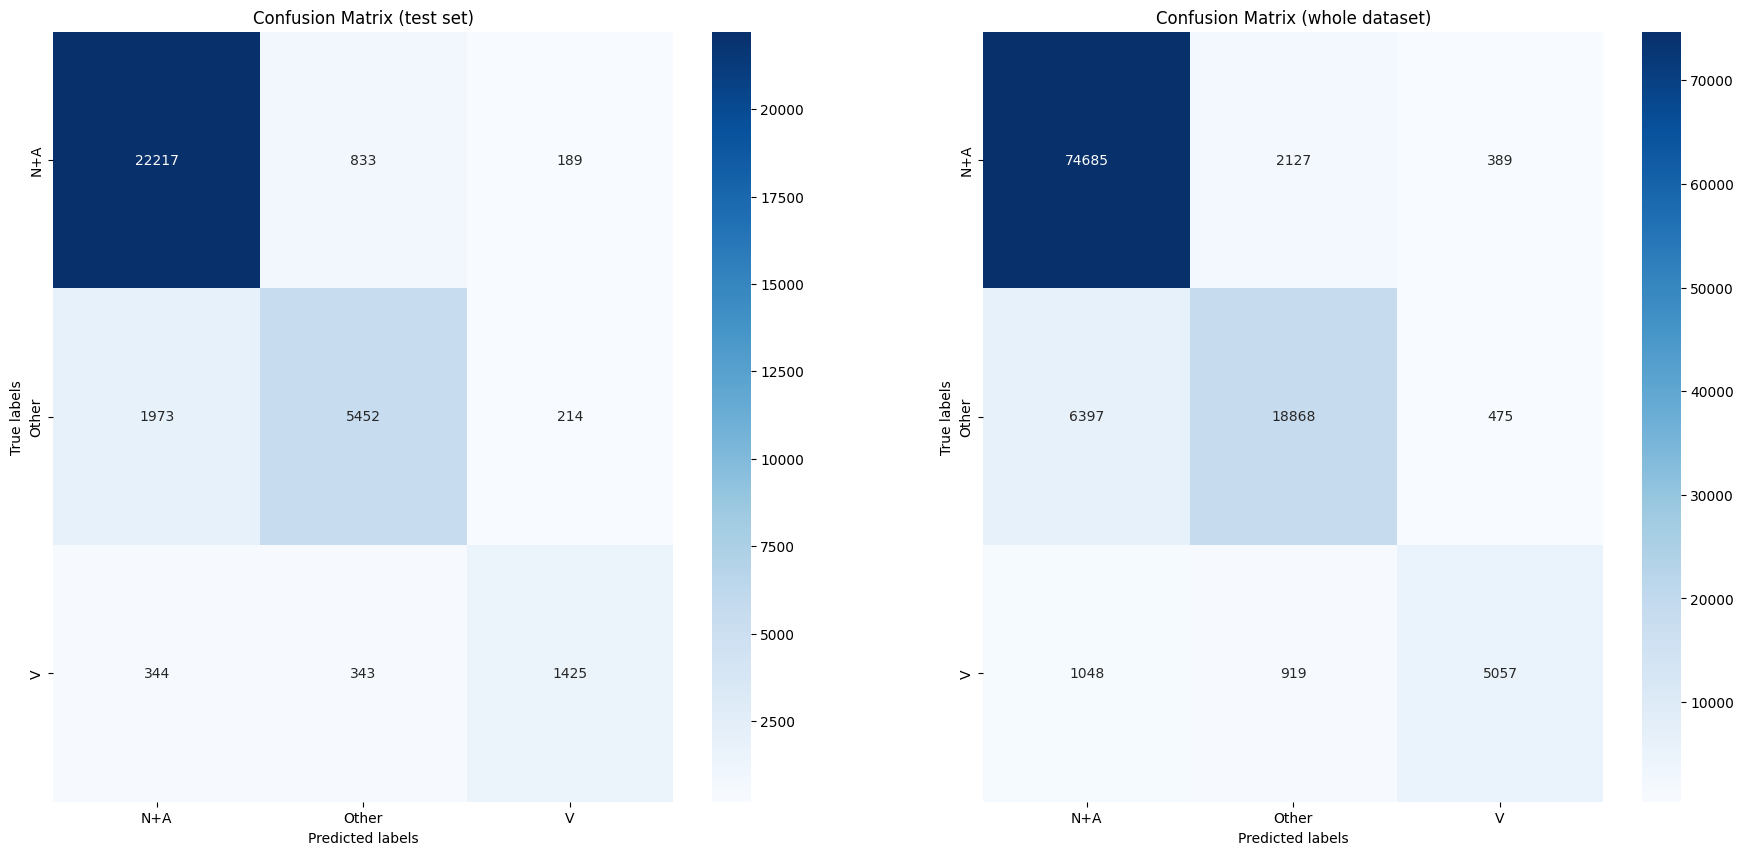

In [18]:
labels = np.unique(y)

clf = classifiers[1]

clf.fit(X_train, y_train) 

y_train_pred = clf.predict(X_train) # predykcja klas-zbiór terningowy
y_test_pred = clf.predict(X_test) # predykcja klas - zbiór testowy
y_all_pred = clf.predict(X)

print(f'classifier: {clf}')
print('Accuracy (train):', accuracy_score(y_train, y_train_pred))
print('Accuracy (test):', accuracy_score(y_test, y_test_pred))

cm_test = confusion_matrix(y_test, y_test_pred)
cm_train = confusion_matrix(y_train, y_train_pred)
cm_all = confusion_matrix(y, y_all_pred)

# Plot confusion matrix
fig = plt.figure(figsize=(22,10))
plt.subplot(1,2,1)

sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (test set)')
plt.savefig('Confusion Matrix (test set) with A')


plt.subplot(1,2,2)
sns.heatmap(cm_all, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (whole dataset)')

plt.show()

c:\Users\jerem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


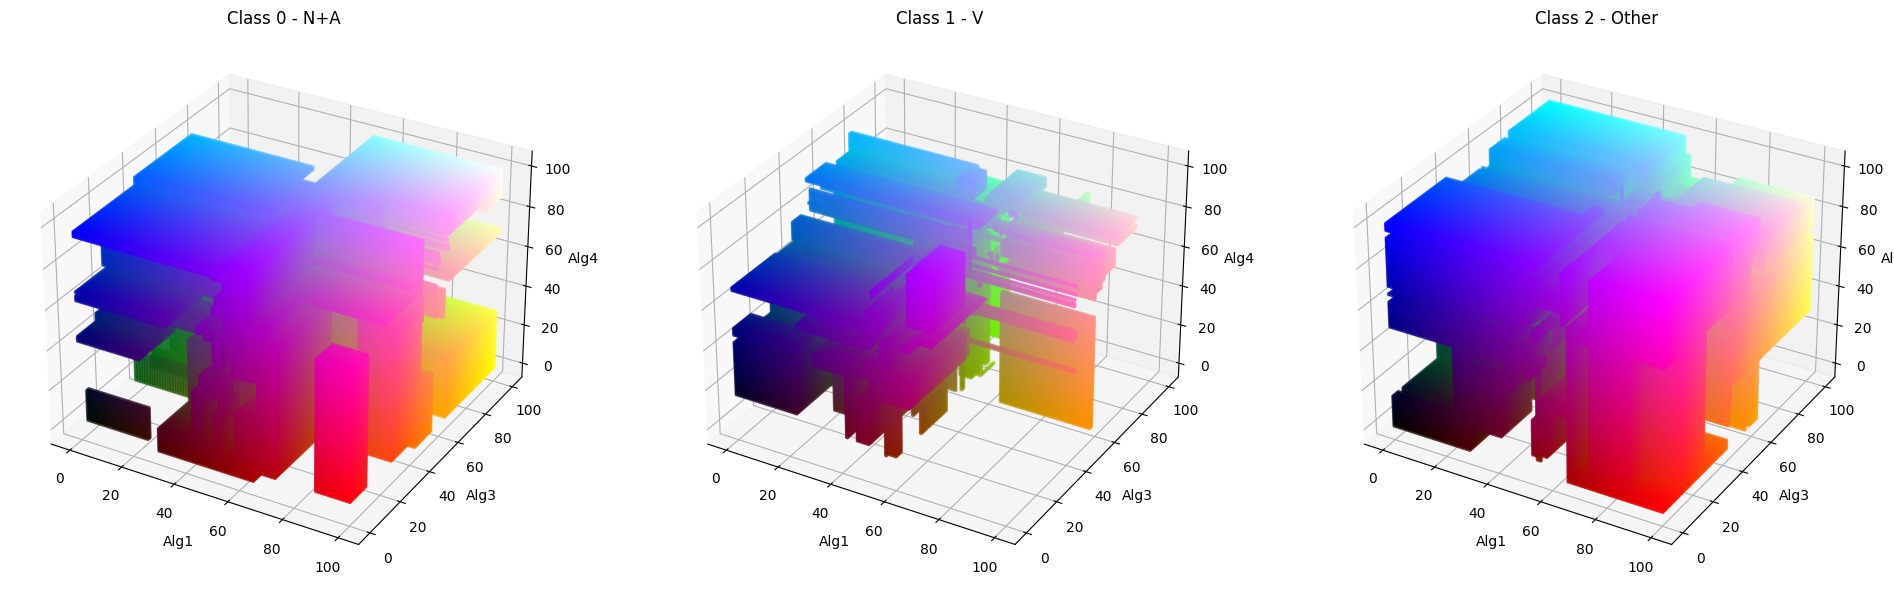

In [19]:
plot_decision_boundries(clf, "Decision Tree")